In [7]:
# ============================================
# PHASE 1: LOAD & INSPECT DATA
# ============================================

In [8]:
# Cell 1: Import Libraries
# TODO: Add a print statement saying "Ready to analyze!"
import pandas as pd
import numpy as np

print("Ready to analyze!")

Ready to analyze!


In [9]:
# Cell 2: Load your dataset
# TODO: Load the CSV file into a variable called 'df'
# Hint: df = pd.read_csv('your_file_path')

# TODO: Print how many rows and columns
# Hint: Use df.shape
df = pd.read_csv('data/mental_wellness_tracker.csv')
print(f"Data loaded! Shape: {df.shape}")

Data loaded! Shape: (300, 12)


In [10]:
# Cell 3: See first few rows
# TODO: Display the first 5 rows
# Hint: df.head()
df.head()  # This shows first 5 rows

,User_ID,Date,Mood_Score,Sleep_Hours,Sleep_Quality,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Weather,Diet_Quality,Stress_Level
0,U001,2023-06-02,6,8.0,Good,4.8,0,3.4,6,Cloudy,Average,4
1,U001,2023-06-09,4,10.0,Excellent,4.0,39,3.4,7,Sunny,Average,6
2,U001,2023-06-14,8,6.5,Fair,4.4,34,1.4,9,Sunny,Good,1
3,U001,2023-06-15,10,8.0,Fair,4.0,62,0.0,10,Cloudy,Poor,1
4,U001,2023-06-21,6,7.2,Poor,4.5,14,1.7,7,Sunny,Good,4


In [11]:
# Cell 4: Get column information
# TODO: Show column names, data types, and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   300 non-null    object 
 1   Date                      300 non-null    object 
 2   Mood_Score                300 non-null    int64  
 3   Sleep_Hours               300 non-null    float64
 4   Sleep_Quality             300 non-null    object 
 5   Screen_Time_Hours         300 non-null    float64
 6   Physical_Activity_Min     300 non-null    int64  
 7   Social_Interaction_Hours  300 non-null    float64
 8   Work_Productivity_Score   300 non-null    int64  
 9   Weather                   300 non-null    object 
 10  Diet_Quality              300 non-null    object 
 11  Stress_Level              300 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 28.2+ KB


In [12]:
# Cell 5: Look for missing values
# TODO: Count missing values in each column

df.isnull().sum()

User_ID                     0
Date                        0
Mood_Score                  0
Sleep_Hours                 0
Sleep_Quality               0
Screen_Time_Hours           0
Physical_Activity_Min       0
Social_Interaction_Hours    0
Work_Productivity_Score     0
Weather                     0
Diet_Quality                0
Stress_Level                0
dtype: int64

In [13]:
# Cell 6: Basic statistics
# TODO: Show summary statistics (mean, std, min, max) for numeric columns

df.describe()

,Mood_Score,Sleep_Hours,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Stress_Level
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,6.026667,6.986333,4.994000,29.723333,2.189000,6.87000,4.110000
std,2.113649,1.382855,1.957926,14.634458,1.455509,2.26942,2.197117
min,1.000000,3.000000,1.000000,0.000000,0.000000,1.00000,1.000000
25%,5.000000,6.100000,3.700000,20.000000,1.100000,5.00000,2.000000
50%,6.000000,7.000000,4.900000,30.000000,2.200000,7.00000,4.000000
75%,8.000000,8.000000,6.300000,39.000000,3.225000,9.00000,6.000000
max,10.000000,10.000000,11.000000,71.000000,7.000000,10.00000,10.000000


In [14]:
# Cell 7: Check unique users
# TODO: How many unique users are in the dataset?

df['User_ID'].nunique()

50

In [15]:
# Cell 8: Entries per user
# TODO: Count how many entries each user has

df['User_ID'].value_counts()

User_ID
U022    11
U007    10
U048    10
U046    10
U030     9
U014     9
U016     8
U019     8
U043     8
U001     7
U026     7
U027     7
U044     7
U035     7
U042     7
U036     7
U038     7
U039     7
U047     7
U045     7
U025     6
U032     6
U006     6
U010     6
U034     6
U040     6
U017     6
U005     6
U009     6
U004     5
U024     5
U021     5
U008     5
U013     5
U041     5
U037     5
U049     5
U050     5
U023     5
U029     5
U012     4
U002     4
U028     4
U033     4
U031     3
U018     3
U020     3
U015     2
U003     2
U011     2
Name: count, dtype: int64

In [16]:
# Cell 9: Calculate average entries per user
average_days = df.groupby('User_ID').size().mean()
print(f"Average entries per user: {average_days} days")

Average entries per user: 6.0 days


In [17]:
# ============================================
# PHASE 2: DATA CLEANING & VALIDATION
# ============================================

In [18]:
# Cell 10: Check value ranges for each column
# Let's verify everything is within expected ranges

print("=== DATA VALIDATION ===\n")

print(f"Mood_Score range: {df['Mood_Score'].min()} to {df['Mood_Score'].max()}")
print(f"Any invalid Mood_Scores? {(df['Mood_Score'] < 1).sum() + (df['Mood_Score'] > 10).sum()}\n")
# TODO: Check Work_Productivity_Score (should also be 1-10)
print(f"Work_Productivity_Score range: {df['Work_Productivity_Score'].min()} to {df['Work_Productivity_Score'].max()}")
# TODO: Check Sleep_Hours (should be 0-24, realistically 3-12)
print(f"Sleep_Hours range: {df['Sleep_Hours'].min()} to {df['Sleep_Hours'].max()}")
# TODO: Check Physical_Activity_Min (should be 0-300, realistically)
print(f"Physical_Activity_Min range: {df['Physical_Activity_Min'].min()} to {df['Physical_Activity_Min'].max()}")
# Screen_Time_Hours (should be 0-24)
print(f"Screen_Time_Hours range: {df['Screen_Time_Hours'].min()} to {df['Screen_Time_Hours'].max()}")
# Stress_Level
print(f"Stress_Level range: {df['Stress_Level'].min()} to {df['Stress_Level'].max()}")

=== DATA VALIDATION ===

Mood_Score range: 1 to 10
Any invalid Mood_Scores? 0

Work_Productivity_Score range: 1 to 10
Sleep_Hours range: 3.0 to 10.0
Physical_Activity_Min range: 0 to 71
Screen_Time_Hours range: 1.0 to 11.0
Stress_Level range: 1 to 10


In [19]:
# Cell 11: Check unique values in categorical columns

print("=== CATEGORICAL COLUMNS ===\n")
categorical_cols = ['Sleep_Quality', 'Weather', 'Diet_Quality']
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip()

# Sleep Quality
print("Sleep_Quality categories:")
print(df['Sleep_Quality'].value_counts())
print()

# Weather Categories
print("Weather categories:")
print(df['Weather'].value_counts())
print()

# Diet Quality
print("Diet_Quality categories:")
print(df['Diet_Quality'].value_counts())
print()

=== CATEGORICAL COLUMNS ===

Sleep_Quality categories:
Sleep_Quality
Good         120
Excellent     82
Fair          61
Poor          37
Name: count, dtype: int64

Weather categories:
Weather
Sunny     112
Rainy     104
Cloudy     84
Name: count, dtype: int64

Diet_Quality categories:
Diet_Quality
Good       176
Average     92
Poor        32
Name: count, dtype: int64



In [20]:
# Cell 12: Look for duplicate entries

# Check if any User_ID has duplicate dates (same user, same day, multiple entries)
duplicates = df[df.duplicated(subset=['User_ID', 'Date'], keep=False)]
print(f"Duplicate entries found: {len(duplicates)}")

if len(duplicates) > 0:
    print("\nDuplicate rows:")
    print(duplicates)
else:
    print("✅ No duplicates - data is clean!")

Duplicate entries found: 0
✅ No duplicates - data is clean!


In [21]:
# ============================================
# PHASE 3: FEATURE ENGINEERING
# ============================================

In [22]:
# Cell 13: Feature Engineering

# Example 1: Sleep Deficit (how far from ideal 8 hours?)
df['Sleep_Deficit'] = 8 - df['Sleep_Hours']
print("✅ Created Sleep_Deficit column")

# Example 2: Is it a weekend?
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])
print("✅ Created Is_Weekend column")

# TODO: Create 'Is_Active' - True if Physical_Activity_Min >= 30
df['Is_Active'] = df['Physical_Activity_Min'] >= 30
print("✅ Created Is_Active column")

# TODO: Create 'High_Screen_Time' - True if Screen_Time_Hours > 6
df['High_Screen_Time'] = df['Screen_Time_Hours'] > 6
print("✅ Created High_Screen_Time column")

# TODO: Create 'Sleep_Quality_Score' - Convert categorical to numeric
# Poor=1, Fair=2, Good=3, Excellent=4
df['Sleep_Quality_Score'] = df['Sleep_Quality'].map({'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4})
print("✅ Created Sleep_Quality_Score column")

# High mood? (Mood_Score >= 8
df['High_Mood'] = df['Mood_Score'] >= 8
print("✅ Created High_Mood column")

# High productivity? (Work_Productivity_Score >= 8)
df['High_Productivity'] = df['Work_Productivity_Score'] >= 8
print("✅ Created High_Productivity column")

print("\n✅ Feature engineering complete!")
df.head()

✅ Created Sleep_Deficit column
✅ Created Is_Weekend column
✅ Created Is_Active column
✅ Created High_Screen_Time column
✅ Created Sleep_Quality_Score column
✅ Created High_Mood column
✅ Created High_Productivity column

✅ Feature engineering complete!


,User_ID,Date,Mood_Score,Sleep_Hours,Sleep_Quality,Screen_Time_Hours,Physical_Activity_Min,Social_Interaction_Hours,Work_Productivity_Score,Weather,Diet_Quality,Stress_Level,Sleep_Deficit,Day_of_Week,Is_Weekend,Is_Active,High_Screen_Time,Sleep_Quality_Score,High_Mood,High_Productivity
0,U001,2023-06-02,6,8.0,Good,4.8,0,3.4,6,Cloudy,Average,4,0.0,Friday,False,False,False,3,False,False
1,U001,2023-06-09,4,10.0,Excellent,4.0,39,3.4,7,Sunny,Average,6,-2.0,Friday,False,True,False,4,False,False
2,U001,2023-06-14,8,6.5,Fair,4.4,34,1.4,9,Sunny,Good,1,1.5,Wednesday,False,True,False,2,True,True
3,U001,2023-06-15,10,8.0,Fair,4.0,62,0.0,10,Cloudy,Poor,1,0.0,Thursday,False,True,False,2,True,True
4,U001,2023-06-21,6,7.2,Poor,4.5,14,1.7,7,Sunny,Good,4,0.8,Wednesday,False,False,False,1,False,False


In [23]:
# Cell 14: Lag Features 

# Sort by user and date first
df = df.sort_values(['User_ID', 'Date'])

# Create previous day's mood
df['Previous_Day_Mood'] = df.groupby('User_ID')['Mood_Score'].shift(1)

# TODO: Create 'Previous_Day_Productivity'
df['Previous_Day_Productivity'] = df.groupby('User_ID')['Work_Productivity_Score'].shift(1)

print("✅ Created lag features")

# Check how many missing values (first day for each user will be NaN)
print(f"\nMissing Previous_Day_Mood: {df['Previous_Day_Mood'].isnull().sum()}")
print("(This is normal - first entry for each user has no 'previous day')")

✅ Created lag features

Missing Previous_Day_Mood: 50
(This is normal - first entry for each user has no 'previous day')


In [24]:
df.columns

Index(['User_ID', 'Date', 'Mood_Score', 'Sleep_Hours', 'Sleep_Quality',
       'Screen_Time_Hours', 'Physical_Activity_Min',
       'Social_Interaction_Hours', 'Work_Productivity_Score', 'Weather',
       'Diet_Quality', 'Stress_Level', 'Sleep_Deficit', 'Day_of_Week',
       'Is_Weekend', 'Is_Active', 'High_Screen_Time', 'Sleep_Quality_Score',
       'High_Mood', 'High_Productivity', 'Previous_Day_Mood',
       'Previous_Day_Productivity'],
      dtype='object')

In [39]:
# ============================================
# PHASE 4: Exploratory Data Analysis (EDA)
# ============================================

In [4]:
# Cell 15: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Visualization libraries loaded!")

✅ Visualization libraries loaded!


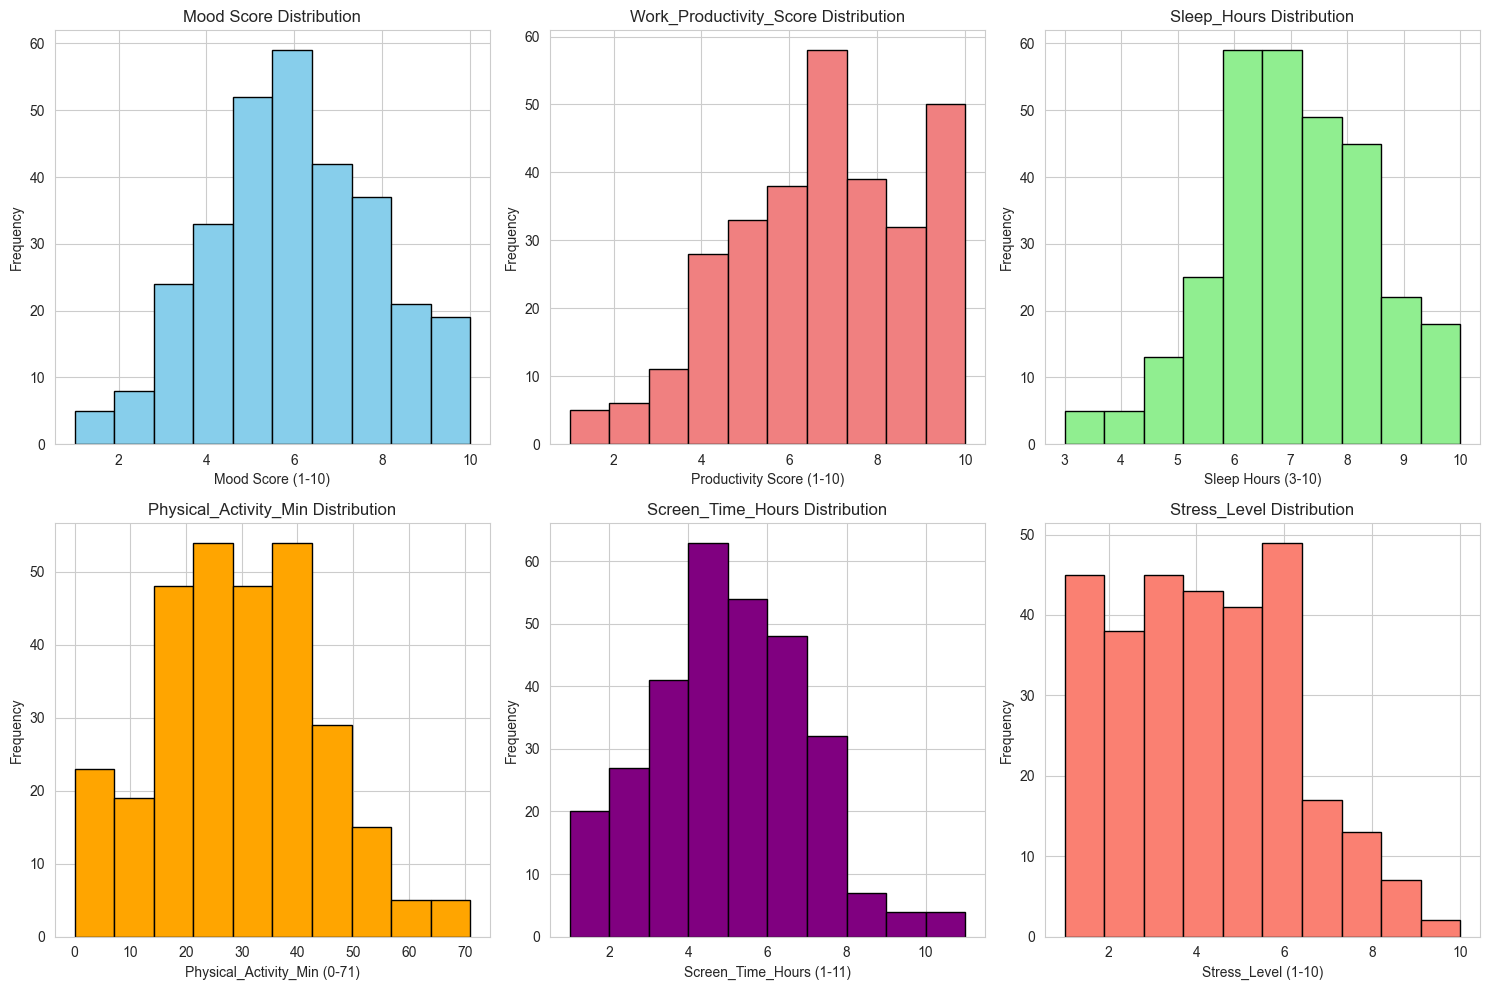

In [25]:
# Cell 16: Distribution of key variables

fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0, 0].hist(df['Mood_Score'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Mood Score Distribution')
axes[0, 0].set_xlabel('Mood Score (1-10)')
axes[0, 0].set_ylabel('Frequency')


# TODO: Create histogram for Work_Productivity_Score
axes[0, 1].hist(df['Work_Productivity_Score'], bins=10, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Work_Productivity_Score Distribution')
axes[0, 1].set_xlabel('Productivity Score (1-10)')
axes[0, 1].set_ylabel('Frequency')

# TODO: Create histogram for Sleep_Hours
axes[0, 2].hist(df['Sleep_Hours'], bins=10, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Sleep_Hours Distribution')
axes[0, 2].set_xlabel('Sleep Hours (3-10)')
axes[0, 2].set_ylabel('Frequency')

# TODO: Create histogram for Physical_Activity_Min
axes[1, 0].hist(df['Physical_Activity_Min'], bins=10, color='orange', edgecolor='black')
axes[1, 0].set_title('Physical_Activity_Min Distribution')
axes[1, 0].set_xlabel('Physical_Activity_Min (0-71)')
axes[1, 0].set_ylabel('Frequency')

# TODO: Create histogram for Screen_Time_Hours
axes[1, 1].hist(df['Screen_Time_Hours'], bins=10, color='purple', edgecolor='black')
axes[1, 1].set_title('Screen_Time_Hours Distribution')
axes[1, 1].set_xlabel('Screen_Time_Hours (1-11)')
axes[1, 1].set_ylabel('Frequency')

# TODO: Create histogram for Stress_Level
axes[1, 2].hist(df['Stress_Level'], bins=10, color='salmon', edgecolor='black')
axes[1, 2].set_title('Stress_Level Distribution')
axes[1, 2].set_xlabel('Stress_Level (1-10)')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

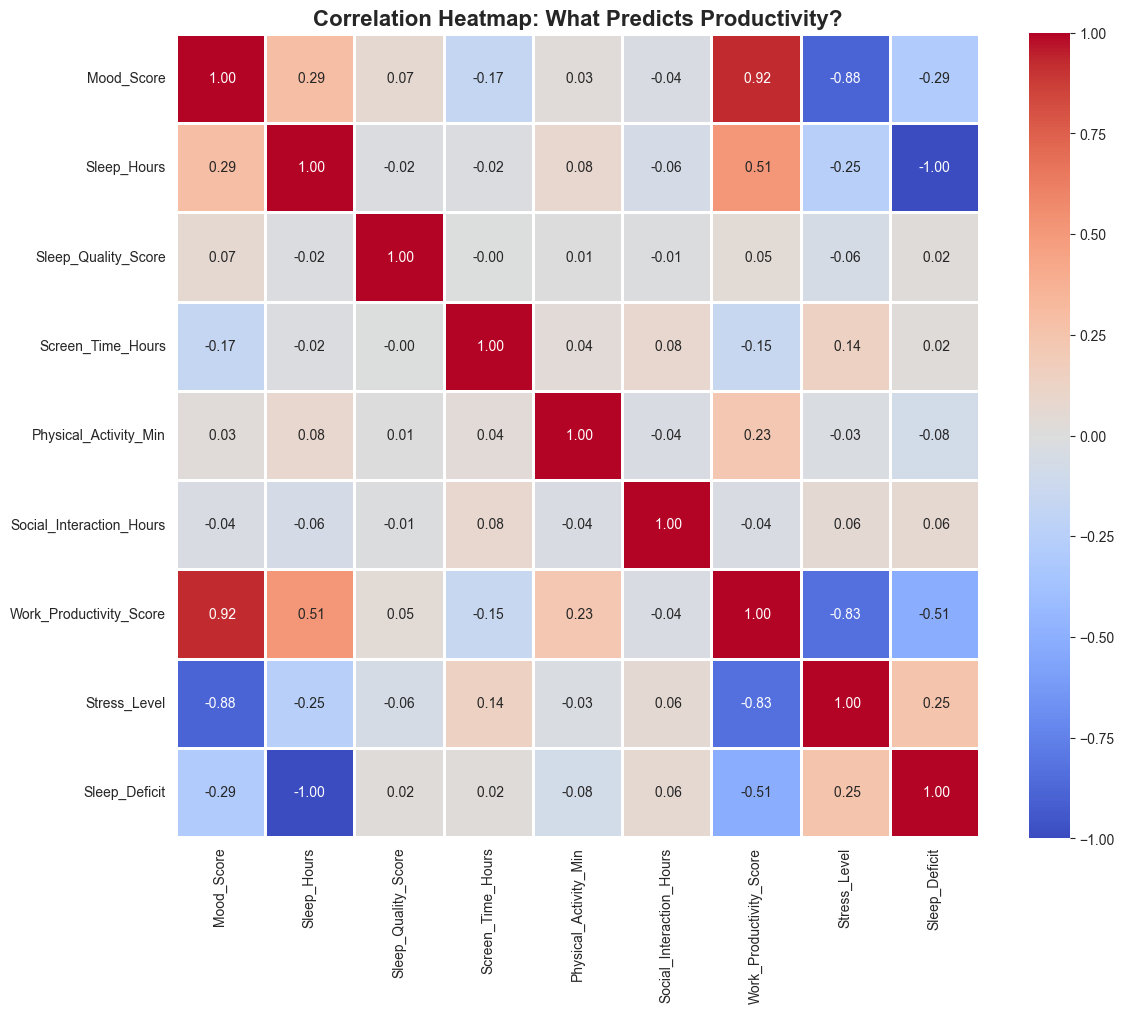


🔍 Look for:
- Strong positive correlations (dark red, close to +1.0)
- Strong negative correlations (dark blue, close to -1.0)
- Which factors correlate most with Work_Productivity_Score?


In [26]:
# Cell 17: Correlation Heatmap

# Select only numeric columns for correlation
numeric_cols = ['Mood_Score', 'Sleep_Hours', 'Sleep_Quality_Score', 
                'Screen_Time_Hours', 'Physical_Activity_Min', 
                'Social_Interaction_Hours', 'Work_Productivity_Score', 
                'Stress_Level', 'Sleep_Deficit']

# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            linewidth=1,
            fmt=' .2f')
plt.title('Correlation Heatmap: What Predicts Productivity?', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Look for:")
print("- Strong positive correlations (dark red, close to +1.0)")
print("- Strong negative correlations (dark blue, close to -1.0)")
print("- Which factors correlate most with Work_Productivity_Score?")

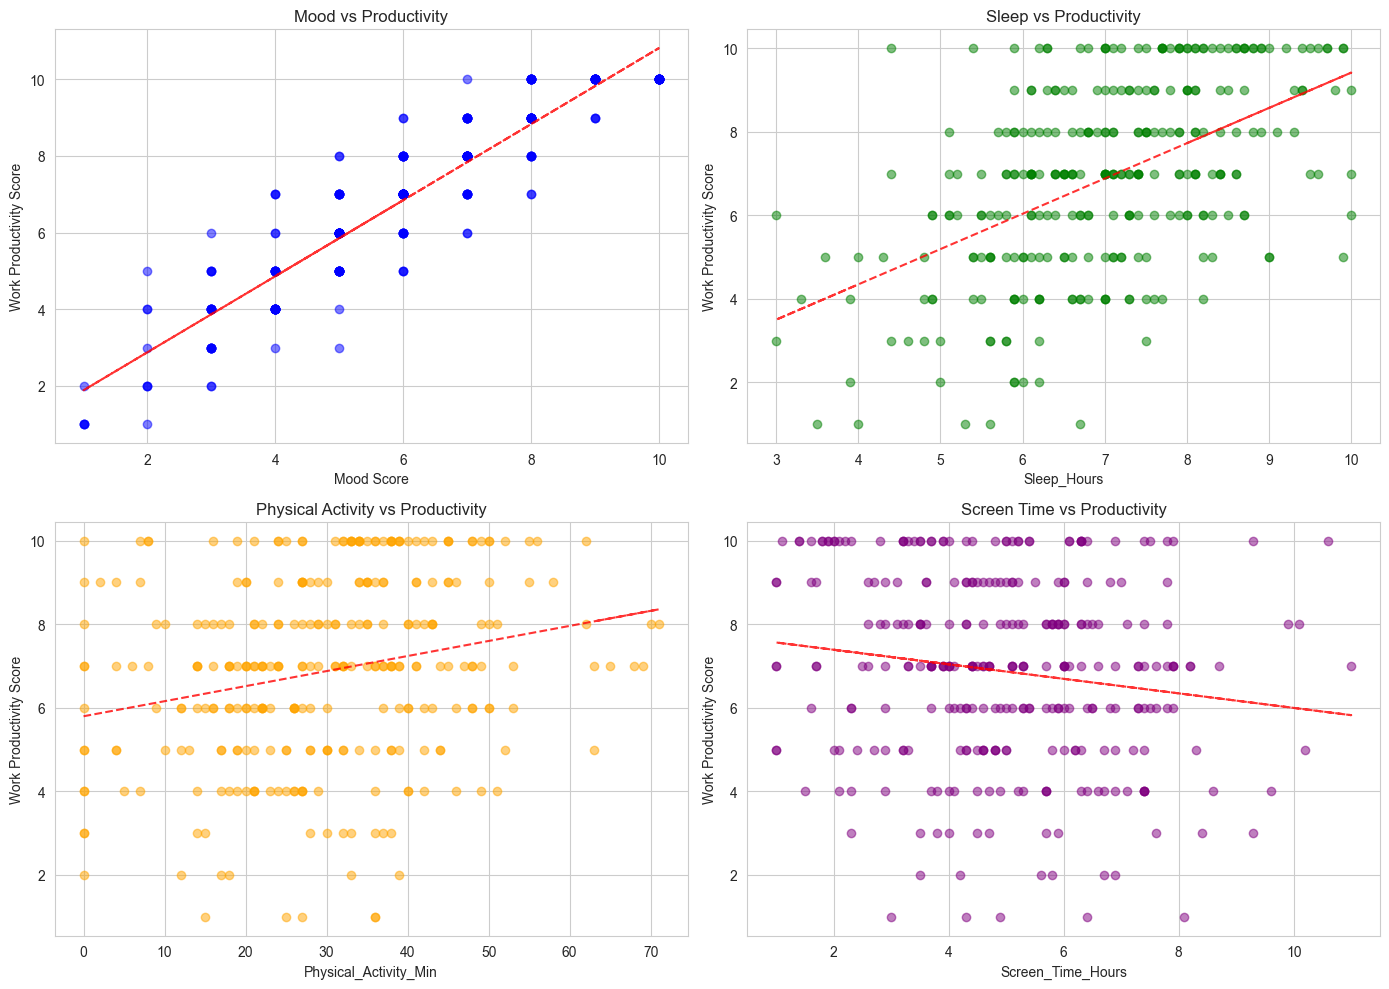

In [32]:
# Cell 18: Scatter plots for key relationships

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Mood vs Productivity
axes[0, 0].scatter(df['Mood_Score'], df['Work_Productivity_Score'], alpha=0.5, color='blue')
axes[0, 0].set_xlabel('Mood Score')
axes[0, 0].set_ylabel('Work Productivity Score')
axes[0, 0].set_title('Mood vs Productivity')
# Add trend line
z = np.polyfit(df['Mood_Score'], df['Work_Productivity_Score'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['Mood_Score'], p(df['Mood_Score']), "r--", alpha=0.8)

# TODO: Sleep_Hours vs Work_Productivity_Score
axes[0, 1].scatter(df['Sleep_Hours'], df['Work_Productivity_Score'], alpha=0.5, color='green')
axes[0, 1].set_xlabel('Sleep_Hours')
axes[0, 1].set_ylabel('Work Productivity Score')
axes[0, 1].set_title('Sleep vs Productivity')

z = np.polyfit(df['Sleep_Hours'], df['Work_Productivity_Score'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['Sleep_Hours'], p(df['Sleep_Hours']), "r--", alpha=0.8)

# TODO: Physical_Activity_Min vs Mood_Score
# Hint: Use axes[1, 0], color='orange'
axes[1, 0].scatter(df['Physical_Activity_Min'], df['Work_Productivity_Score'], alpha=0.5, color='orange')
axes[1, 0].set_xlabel('Physical_Activity_Min')
axes[1, 0].set_ylabel('Work Productivity Score')
axes[1, 0].set_title('Physical Activity vs Productivity')

z = np.polyfit(df['Physical_Activity_Min'], df['Work_Productivity_Score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(df['Physical_Activity_Min'], p(df['Physical_Activity_Min']), "r--", alpha=0.8)

# TODO: Screen_Time_Hours vs Mood_Score
# Hint: Use axes[1, 1], color='purple'
axes[1, 1].scatter(df['Screen_Time_Hours'], df['Work_Productivity_Score'], alpha=0.5, color='purple')
axes[1, 1].set_xlabel('Screen_Time_Hours')
axes[1, 1].set_ylabel('Work Productivity Score')
axes[1, 1].set_title('Screen Time vs Productivity')

z = np.polyfit(df['Screen_Time_Hours'], df['Work_Productivity_Score'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df['Screen_Time_Hours'], p(df['Screen_Time_Hours']), "r--", alpha=0.8)


plt.tight_layout()
plt.show()

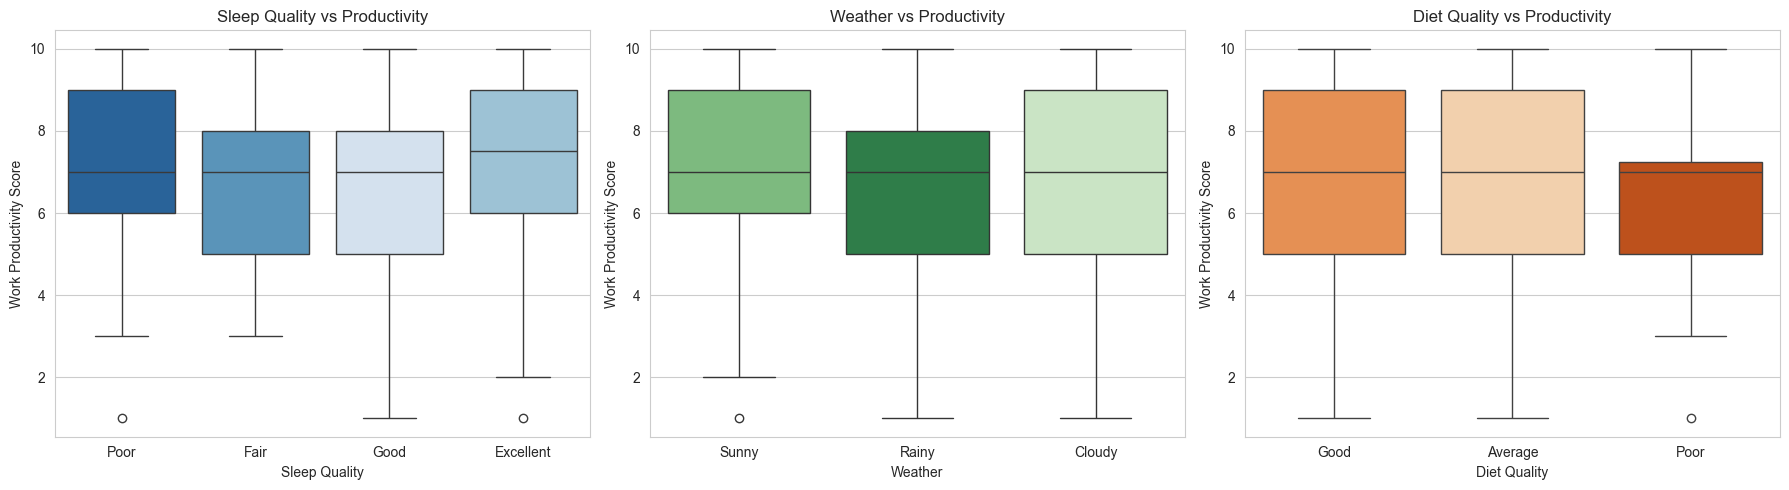


💡 Insight: Does sleep quality matter for productivity?


In [40]:
# Cell 19: Box plots for categorical variables

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sleep Quality vs Productivity
sleep_order = ['Poor', 'Fair', 'Good', 'Excellent']
sns.boxplot(data=df, x='Sleep_Quality', y='Work_Productivity_Score', order=sleep_order, ax=axes[0], hue='Sleep_Quality', palette='Blues')
axes[0].set_title('Sleep Quality vs Productivity')
axes[0].set_xlabel('Sleep Quality')
axes[0].set_ylabel('Work Productivity Score')

# TODO: Weather vs Productivity
# Hint: Use sns.boxplot with axes[1], palette='Greens'
weather_order = ['Sunny', 'Rainy', 'Cloudy']
sns.boxplot(data=df, x='Weather',  y='Work_Productivity_Score', order=weather_order, ax=axes[1], hue='Weather', palette='Greens')
axes[1].set_title('Weather vs Productivity')
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('Work Productivity Score')

# TODO: Diet_Quality vs Productivity  
# Hint: Use axes[2], palette='Oranges'
diet_order = ['Good', 'Average', 'Poor']
sns.boxplot(data=df, x='Diet_Quality',  y='Work_Productivity_Score', order=diet_order, ax=axes[2], hue='Diet_Quality', palette='Oranges')
axes[2].set_title('Diet Quality vs Productivity')
axes[2].set_xlabel('Diet Quality')
axes[2].set_ylabel('Work Productivity Score')

plt.tight_layout()
plt.show()

print("\n💡 Insight: Does sleep quality matter for productivity?")

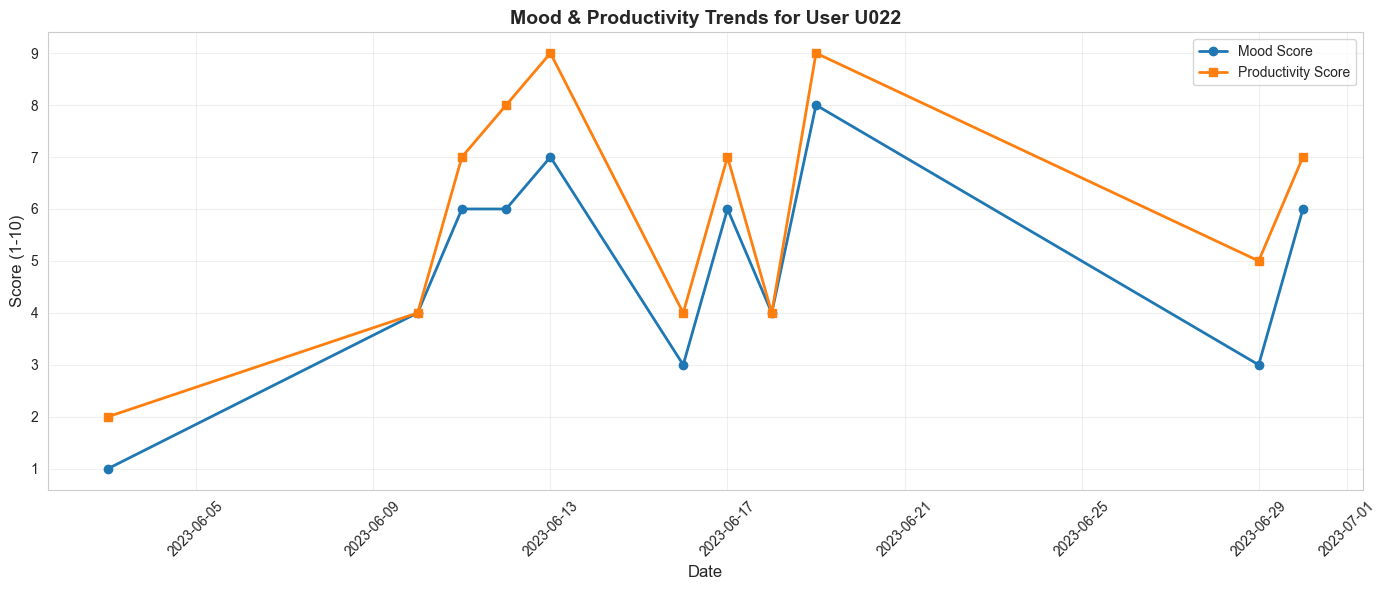


📈 Do you see mood and productivity moving together?


In [38]:
# Cell 20: Productivity trends over time (for a sample user)

# Pick a user with lots of data (U022 has 11 entries)
sample_user = df[df['User_ID'] == 'U022'].sort_values('Date')

plt.figure(figsize=(14, 6))

# Plot mood and productivity over time
plt.plot(sample_user['Date'], sample_user['Mood_Score'], marker='o', label='Mood Score', linewidth=2)
plt.plot(sample_user['Date'], sample_user['Work_Productivity_Score'], marker='s', label='Productivity Score', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Score (1-10)', fontsize=12)
plt.title('Mood & Productivity Trends for User U022', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Do you see mood and productivity moving together?")

In [58]:
# Cell 21A: Personal Correlation Analysis (Example)

def get_personal_insights(user_id):
    """
    Calculate correlations for a specific user
    """
    # Filter to this user only
    user_data = df[df['User_ID'] == user_id]
    
    # Need at least 7 days for meaningful correlations
    if len(user_data) < 7:
        return "Keep logging! Need 7+ days for personalized insights."
    
    # Calculate correlations for THIS user
    factors = ['Mood_Score', 'Sleep_Hours', 'Sleep_Quality_Score',
               'Physical_Activity_Min', 'Screen_Time_Hours', 'Stress_Level']
    
    correlations = {}
    for factor in factors:
        corr = user_data[factor].corr(user_data['Work_Productivity_Score'])
        correlations[factor] = corr
    
    # Sort by absolute value (strongest relationships first)
    sorted_corr = sorted(correlations.items(), 
                        key=lambda x: abs(x[1]), 
                        reverse=True)
    
    # Generate personalized message
    top_3 = sorted_corr[:3]
    
    print(f"\n{'='*60}")
    print(f"PERSONALIZED INSIGHTS FOR {user_id}")
    print(f"{'='*60}")
    print(f"Based on YOUR {len(user_data)} days of data:\n")
    
    for i, (factor, corr) in enumerate(top_3, 1):
        direction = "increases" if corr > 0 else "decreases"
        strength = "strongly" if abs(corr) > 0.6 else "moderately"
        
        print(f"{i}. {factor}: {corr:.2f}")
        print(f"   → Your productivity {strength} {direction} with {factor}\n")
    
    return sorted_corr

# Try it for a user with lots of data
get_personal_insights('U022')


PERSONALIZED INSIGHTS FOR U022
Based on YOUR 11 days of data:

1. Mood_Score: 0.96
   → Your productivity strongly increases with Mood_Score

2. Stress_Level: -0.70
   → Your productivity strongly decreases with Stress_Level

3. Sleep_Hours: 0.59
   → Your productivity moderately increases with Sleep_Hours



[('Mood_Score', np.float64(0.9556223425177682)),
 ('Stress_Level', np.float64(-0.7013254845824242)),
 ('Sleep_Hours', np.float64(0.5886534072004168)),
 ('Screen_Time_Hours', np.float64(-0.3849167168796581)),
 ('Sleep_Quality_Score', np.float64(0.15957118462605635)),
 ('Physical_Activity_Min', np.float64(-0.06907341907162196))]

In [60]:
# Cell 21B: Personal Correlation Analysis (Example)
def get_personal_insights(user_id):
    """
    Calculate correlations for a specific user
    """
    user_data = df[df['User_ID'] == user_id]

    # Need at least 7 days for meaningful correlations
    if len(user_data) < 7:
        return "Keep logging! Need 7+ days for personalized insights."

    # Calculate correlations for THIS user
    factors = ['Mood_Score', 'Sleep_Hours', 'Sleep_Quality_Score',
               'Physical_Activity_Min', 'Screen_Time_Hours', 'Stress_Level']

    correlations = {}
    for factor in factors:
        corr = user_data[factor].corr(user_data['Work_Productivity_Score'])
        correlations[factor] = corr

    # Sort by absolute value (strongest relationships first)
    sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

    # Generate personalized message
    top_3 = sorted_corr[:3]

    print(f"\n{'='*60}")
    print(f"PERSONALIZED INSIGHTS FOR {user_id}")
    print(f"{'='*60}")
    print(f"Based on YOUR {len(user_data)} days of data:\n")
    
    for i, (factor, corr) in enumerate(top_3, 1):
        direction = "increases" if corr > 0 else "decreases"
        strength = "strongly" if abs(corr) > 0.6 else "moderately"
        
        print(f"{i}. {factor}: {corr:.2f}")
        print(f"   → Your productivity {strength} {direction} with {factor}\n")
    
    return sorted_corr

get_personal_insights('U001')


PERSONALIZED INSIGHTS FOR U001
Based on YOUR 7 days of data:

1. Stress_Level: -0.90
   → Your productivity strongly decreases with Stress_Level

2. Mood_Score: 0.90
   → Your productivity strongly increases with Mood_Score

3. Screen_Time_Hours: -0.77
   → Your productivity strongly decreases with Screen_Time_Hours



[('Stress_Level', np.float64(-0.9026720391952036)),
 ('Mood_Score', np.float64(0.8977768595111391)),
 ('Screen_Time_Hours', np.float64(-0.7674452986201254)),
 ('Physical_Activity_Min', np.float64(0.411040842509092)),
 ('Sleep_Quality_Score', np.float64(-0.3999999999999999)),
 ('Sleep_Hours', np.float64(-0.10892812313408926))]

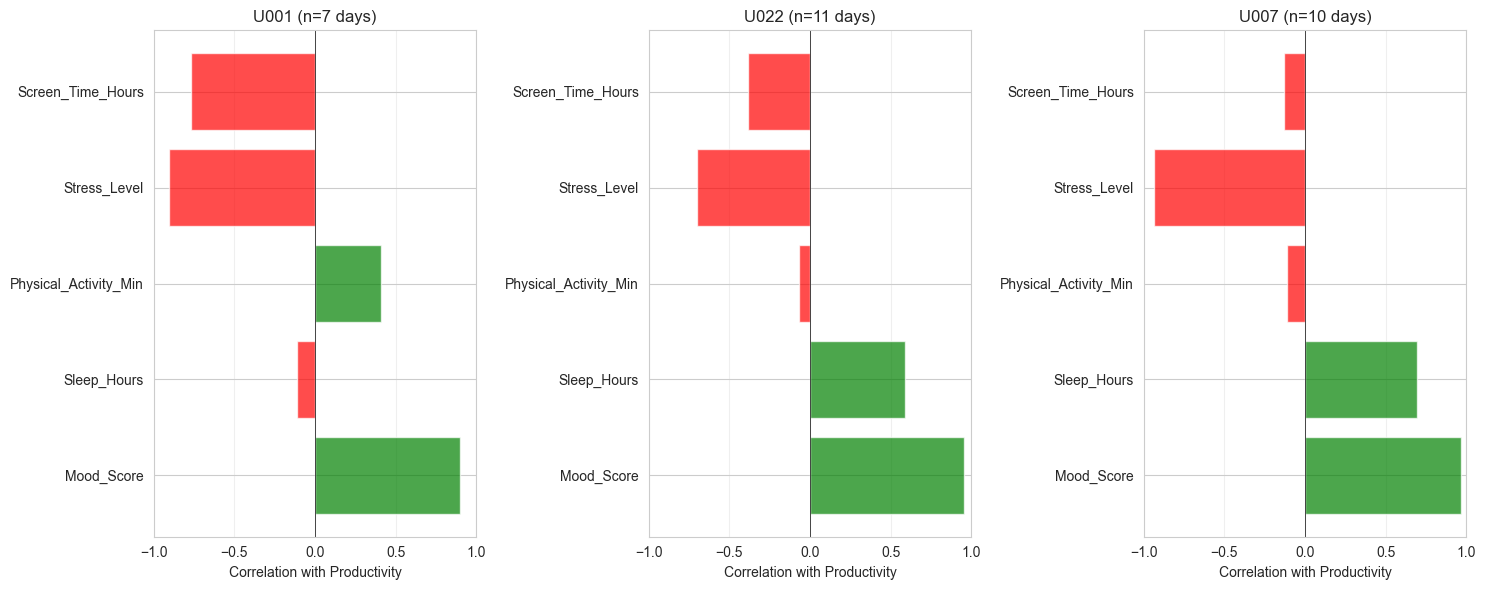

In [62]:
# Cell 22: Compare Multiple Users

def compare_users(user_ids):
    """
    Compare top productivity factors across different users
    """
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, len(user_ids), figsize=(5*len(user_ids), 6))

    for idx, user_id in enumerate(user_ids):
        user_data = df[df['User_ID'] == user_id]

        factors = ['Mood_Score', 'Sleep_Hours', 'Physical_Activity_Min', 
                   'Stress_Level', 'Screen_Time_Hours']

        correlations = []
        for factor in factors:
            corr = user_data[factor].corr(user_data['Work_Productivity_Score'])
            correlations.append(corr)

        # Plot
        ax = axes[idx] if len(user_ids) > 1 else axes
        colors = ['red' if c < 0 else 'green' for c in correlations]
        ax.barh(factors, correlations, color=colors, alpha=0.7)
        ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
        ax.set_xlabel('Correlation with Productivity')
        ax.set_title(f'{user_id} (n={len(user_data)} days)')
        ax.set_xlim(-1, 1)
        ax.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()                          
    
# Compare 3 users with different amounts of data
compare_users(['U001', 'U022', 'U007'])

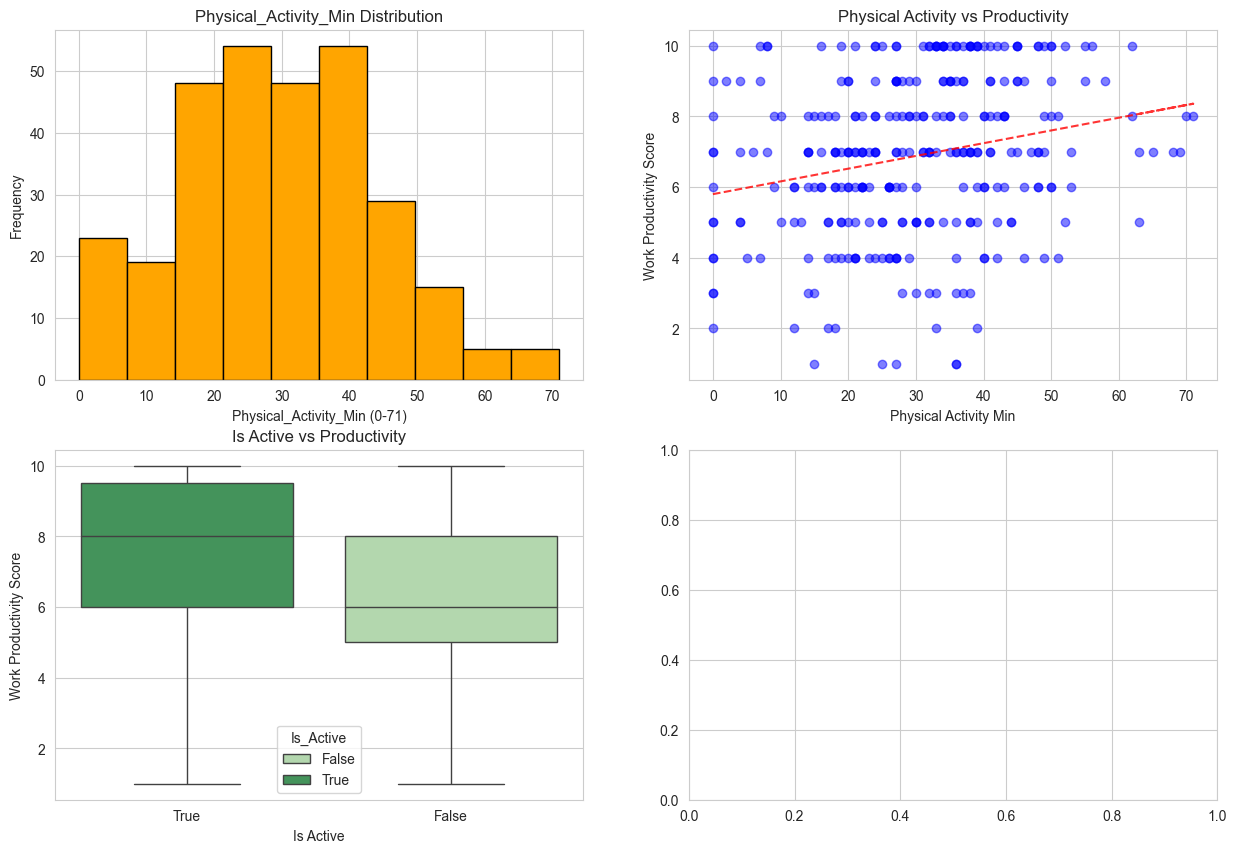

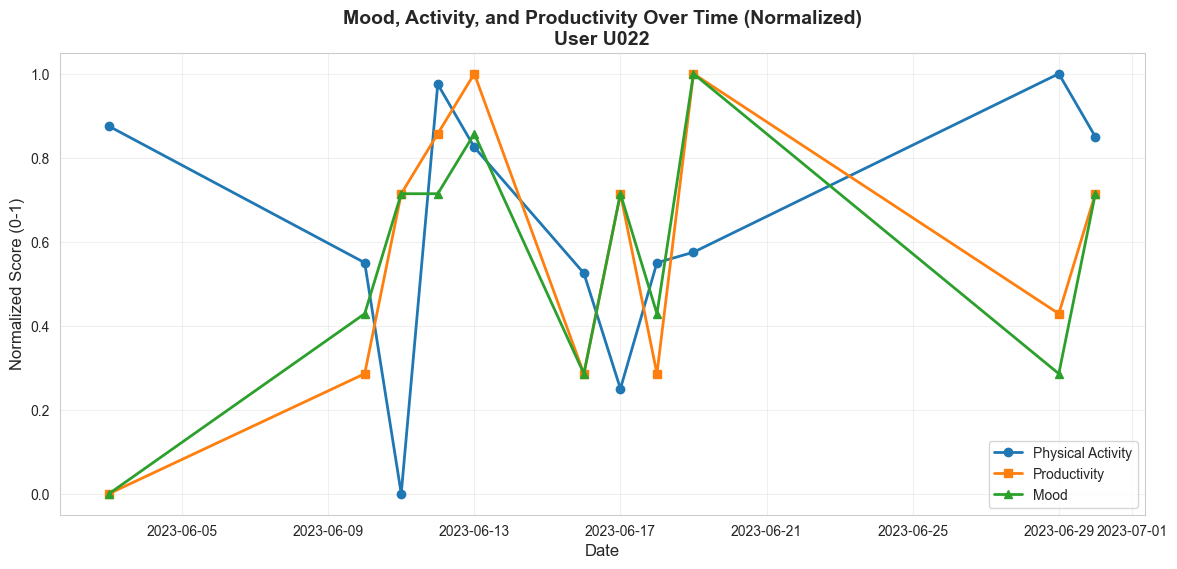

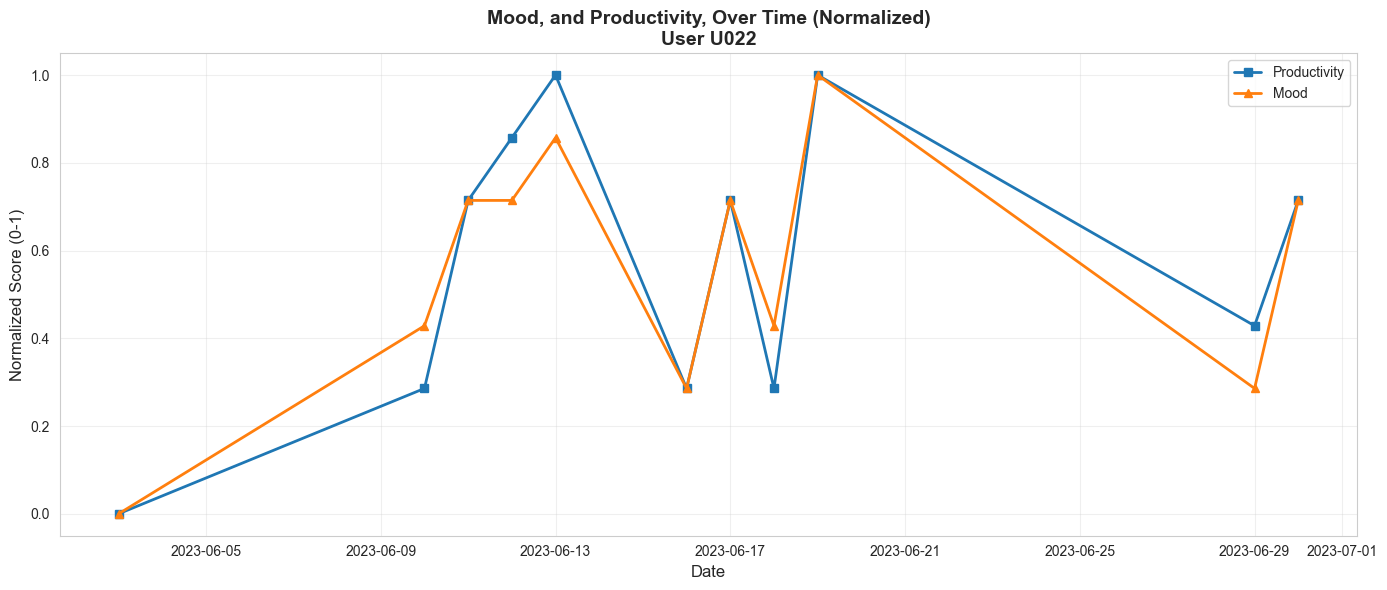

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


# How these visualizations tell a story together
# Here's the BIGGER picture - these four visualizations tell a complete story:
# Let's say you were building recommendations for EXERCISE:

# Histogram: "Most users exercise 20-40 min/day. Distribution is left-skewed → Insight: "People don't exercise much overall"

# TODO: Create histogram for Physical_Activity_Min
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes[0, 0].hist(df['Physical_Activity_Min'], bins= 10, color='orange', edgecolor='black')
axes[0, 0].set_title('Physical_Activity_Min Distribution')
axes[0, 0].set_xlabel('Physical_Activity_Min (0-71)')
axes[0, 0].set_ylabel('Frequency')

# Scatter Plot: "Physical_Activity_Min has weak correlation (0.23) with productivity" → Insight: "Exercise doesn't directly boost productivity"
axes[0, 1].scatter(df['Physical_Activity_Min'], df['Work_Productivity_Score'], alpha=0.5, color='blue')
axes[0, 1].set_xlabel('Physical Activity Min')
axes[0, 1].set_ylabel('Work Productivity Score')
axes[0, 1].set_title('Physical Activity vs Productivity')
z = np.polyfit(df['Physical_Activity_Min'], df['Work_Productivity_Score'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df['Physical_Activity_Min'], p(df['Physical_Activity_Min']), "r--", alpha=0.8)

# Box Plot:  "Productivity is similar across all exercise levels. Active people vs Inactive people have same median" 
# → Insight: "Exercise doesn't affect group-level productivity"
is_active = [True, False]
sns.boxplot(data=df, x='Is_Active', y='Work_Productivity_Score', order=is_active, ax=axes[1, 0], hue='Is_Active', palette='Greens')
axes[1, 0].set_title('Is Active vs Productivity')
axes[1, 0].set_xlabel('Is Active')
axes[1, 0].set_ylabel('Work Productivity Score')


# Line Graph for User U022: "On days they exercise, mood goes UP. On rest days, mood is lower"
# → Insight: "Exercise doesn't boost PRODUCTIVITY directly, but it boosts MOOD, which then affects productivity"
def normalize_series(series):
    """Normalize series to 0-1 range"""
    min_val = series.min()
    max_val = series.max()
    return (series - min_val) / (max_val - min_val)

sample_user = df[df['User_ID'] == 'U022'].sort_values('Date')

# Create normalized versions
sample_user['Mood_Normalized'] = normalize_series(sample_user['Mood_Score'])
sample_user['Activity_Normalized'] = normalize_series(sample_user['Physical_Activity_Min'])
sample_user['Productivity_Normalized'] = normalize_series(sample_user['Work_Productivity_Score'])

plt.figure(figsize=(14, 6))
plt.plot(sample_user['Date'], sample_user['Activity_Normalized'], marker='o', label='Physical Activity', linewidth=2)
plt.plot(sample_user['Date'], sample_user['Productivity_Normalized'],marker='s', label='Productivity', linewidth=2)
plt.plot(sample_user['Date'], sample_user['Mood_Normalized'],marker='^', label='Mood', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Score (0-1)', fontsize=12)
plt.title('Mood, Activity, and Productivity Over Time (Normalized)\nUser U022', 
              fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.figure(figsize=(14,6))
plt.plot(sample_user['Date'], sample_user['Productivity_Normalized'], marker='s', label='Productivity', linewidth=2)
plt.plot(sample_user['Date'], sample_user['Mood_Normalized'],marker='^', label='Mood', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Score (0-1)', fontsize=12)
plt.title('Mood, and Productivity, Over Time (Normalized)\nUser U022', 
              fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [91]:
# ===================================================
# PHASE 5: CORRELATION DEEP DIVE & INSIGHTS GENERATOR
# ===================================================

In [112]:
# Cell 26: Individual User Correlation Analysis
def analyze_user_correlations(user_id, min_days=5):
    """
    Calculate productivity correlations for a specific user
    
    Parameters:
    - user_id: The user to analyze (e.g., 'U022')
    - min_days: Minimum days of data required (default 5)
    
    Returns:
    - Dictionary of correlations
    """

    # Filter to this user only
    user_data = df[df['User_ID'] == user_id].copy()

    # Check if enough data
    if len(user_data) < min_days:
        print(f"⚠️  {user_id} only has {len(user_data)} days. Need {min_days}+ for reliable insights.")
        return None

    print(f"{'='*60}")
    print(f"CORRELATION ANALYSIS FOR {user_id}")
    print(f"{'='*60}")
    print(f"Days of data: {len(user_data)}\n")

    # Define factors to analyze
    factors = {
        'Mood_Score': 'Mood',
        'Sleep_Hours': 'Sleep Duration',
        'Sleep_Quality_Score': 'Sleep Quality',
        'Physical_Activity_Min': 'Physical Activity',
        'Screen_Time_Hours': 'Screen Time',
        'Social_Interaction_Hours': 'Social Interaction',
        'Stress_Level': 'Stress',
        'Sleep_Deficit': 'Sleep Deficit'
    }

    # Calculate correlation with Work_Productivity_Score
    correlations = {}
    
    for factor_col, factor_name in factors.items():
        # Calculate correlation
        corr = user_data[factor_col].corr(user_data['Work_Productivity_Score'])
        correlations[factor_name] = corr

    # TODO: Sort correlations by absolute value (strongest first)
    sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

    # TODO: Print the top 5 factors
    for i, (factor, corr) in enumerate(sorted_corr[:5], 1):
        # Determine strength
        if abs(corr) > 0.7:
            strength = "⭐⭐⭐ STRONG"
        elif abs(corr) > 0.4:
            strength = "⭐⭐ MODERATE"
        else:
            strength = "⭐ WEAK"
        print(f"{i}. {factor}: {corr} {strength}")

    return correlations

# Test it on User U022 (who has 11 days of data)
result = analyze_user_correlations('U022')

CORRELATION ANALYSIS FOR U022
Days of data: 11

1. Mood: 0.9556223425177682 ⭐⭐⭐ STRONG
2. Stress: -0.7013254845824242 ⭐⭐⭐ STRONG
3. Sleep Duration: 0.5886534072004168 ⭐⭐ MODERATE
4. Sleep Deficit: -0.5886534072004168 ⭐⭐ MODERATE
5. Screen Time: -0.3849167168796581 ⭐ WEAK


In [122]:
# Cell 27: Categorize Factors as Boosters vs Drainers

def analyze_user_correlations(user_id, min_days=5):
    # Filter to this user only
    user_data = df[df['User_ID'] == user_id].copy()

    # Check if enough data
    if len(user_data) < min_days:
        print(f"⚠️  {user_id} only has {len(user_data)} days. Need {min_days}+ for reliable insights.")
        return None

    # Define factors to analyze
    factors = {
        'Mood_Score': 'Mood',
        'Sleep_Hours': 'Sleep Duration',
        'Sleep_Quality_Score': 'Sleep Quality',
        'Physical_Activity_Min': 'Physical Activity',
        'Screen_Time_Hours': 'Screen Time',
        'Social_Interaction_Hours': 'Social Interaction',
        'Stress_Level': 'Stress',
        'Sleep_Deficit': 'Sleep Deficit'
    }

    # Calculate correlation with Work_Productivity_Score
    correlations = {}
    
    for factor_col, factor_name in factors.items():
        # Calculate correlation
        corr = user_data[factor_col].corr(user_data['Work_Productivity_Score'])
        correlations[factor_name] = corr

    sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

    return correlations

# Test it on User U022 (who has 11 days of data)
result = analyze_user_correlations('U022')

def categorize_factors(correlations):
    """
    Split factors into positive and negative correlations
    
    Returns:
    - boosters: factors with positive correlation
    - drainers: factors with negative correlation
    """

    # Define emoji for each factor
    factor_emojis = {
        'Mood': '😊',
        'Sleep Duration': '😴',
        'Sleep Quality': '🛌',
        'Physical Activity': '🏃',
        'Screen Time': '📱',
        'Social Interaction': '👥',
        'Stress': '😰',
        'Sleep Deficit': '⏰',
        'Diet Quality': '🥗'
    }

    boosters = {}
    drainers = {}

    for factor, corr in correlations.items():
        if corr > 0:
            boosters[factor] = corr
        elif corr < 0:
            drainers[factor] = corr
    
    # TODO: Sort boosters by correlation (highest first)
    sorted_boosters = sorted(boosters.items(), key=lambda x: x[1], reverse=True)
    
    # TODO: Sort drainers by absolute value (most negative first)
    sorted_drainers = sorted(drainers.items(), key=lambda x: x[1])

    return sorted_boosters, sorted_drainers, factor_emojis

def analyze_user_with_categories(user_id):
    """Complete analysis with categories"""
    correlations = analyze_user_correlations(user_id)

    if correlations is None:
        return

    boosters, drainers, emojis = categorize_factors(correlations)

    print(f"\n{'='*60}")
    print("🚀 PRODUCTIVITY BOOSTERS (Do MORE of these)")
    print(f"{'='*60}")
    # TODO: Print top 3 boosters
    for i, (factor, corr) in enumerate(boosters[:3], 1):
        emoji = emojis.get(factor, '📊')
        # Determine strength
        if abs(corr) > 0.7:
            strength = "⭐⭐⭐ STRONG"
        elif abs(corr) > 0.4:
            strength = "⭐⭐ MODERATE"
        else:
            strength = "⭐ WEAK"
        print(f"{i}. {emoji} {factor}: {corr} {strength}")
    
    
    print(f"\n{'='*60}")
    print("⚠️  PRODUCTIVITY DRAINERS (AVOID these)")
    print(f"{'='*60}")
    # TODO: Print all drainers
    if len(drainers) == 0:
        print("✅ Great news! No major drainers detected.")
    else: 
        for i, (factor, corr) in enumerate(drainers, 1):
            emoji = emojis.get(factor, '📊')
            # Determine strength
            if abs(corr) > 0.7:
                strength = "⭐⭐⭐ STRONG"
            elif abs(corr) > 0.4:
                strength = "⭐⭐ MODERATE"
            else:
                strength = "⭐ WEAK"
            print(f"{i}. {emoji} {factor}: {corr} {strength}")


analyze_user_with_categories('U022')    


🚀 PRODUCTIVITY BOOSTERS (Do MORE of these)
1. 😊 Mood: 0.9556223425177682 ⭐⭐⭐ STRONG
2. 😴 Sleep Duration: 0.5886534072004168 ⭐⭐ MODERATE
3. 🛌 Sleep Quality: 0.15957118462605635 ⭐ WEAK

⚠️  PRODUCTIVITY DRAINERS (AVOID these)
1. 😰 Stress: -0.7013254845824242 ⭐⭐⭐ STRONG
2. ⏰ Sleep Deficit: -0.5886534072004168 ⭐⭐ MODERATE
3. 📱 Screen Time: -0.3849167168796581 ⭐ WEAK
4. 🏃 Physical Activity: -0.06907341907162196 ⭐ WEAK


In [134]:
# Cell 28: Natural Language Insight Generator

def generate_insights(user_id):
    """
    Generate natural language insights for a user
    """
    user_data = df[df['User_ID'] == user_id].copy()

    if len(user_data) < 5:
        return f"Keep logging! You need {5 - len(user_data)} more days for personalized insights."

    correlations = analyze_user_correlations(user_id)
    boosters, drainers, emojis = categorize_factors(correlations)

    # Start building the insight text
    insight = f"\n{'='*60}\n"
    insight += f"📊 PERSONALIZED INSIGHTS FOR {user_id}\n"
    insight += f"{'='*60}\n"
    insight += f"Based on {len(user_data)} days of your data\n\n"

    # ===================================
    # SECTION 1: TOP BOOSTER
    # ===================================

    top_factor, top_corr = boosters[0]
    emoji = emojis.get(top_factor, '📊')
    
    insight += f"🎯 **YOUR #1 PRODUCTIVITY DRIVER: {top_factor.upper()}** {emoji}\n\n"
    
    if abs(top_corr) > 0.8:
        insight += f"Your {top_factor.lower()} has an EXTREMELY STRONG correlation "
        insight += f"({top_corr:.2f}) with your productivity.\n\n"
    elif abs(top_corr) > 0.6:
        insight += f"Your {top_factor.lower()} has a STRONG correlation "
        insight += f"({top_corr:.2f}) with your productivity.\n\n"
    else:
        insight += f"Your {top_factor.lower()} has a MODERATE correlation "
        insight += f"({top_corr:.2f}) with your productivity.\n\n"
    
    # Add specific recommendation for top booster
    recommendations = {
        'Mood': "💡 Focus on: Mood-boosting activities (exercise, social time, hobbies, gratitude practice)",
        'Sleep Duration': "💡 Focus on: Getting consistent 7-8 hours. Set a fixed bedtime routine.",
        'Sleep Quality': "💡 Focus on: Improve sleep environment (dark room, cool temp, no screens 1hr before bed)",
        'Physical Activity': "💡 Focus on: Get 30+ minutes of movement daily. Find activities you genuinely enjoy.",
        'Social Interaction': "💡 Focus on: Schedule regular social time. Quality over quantity matters.",
    }
    
    insight += recommendations.get(top_factor, f"💡 Focus on: Improving your {top_factor.lower()}\n")
    insight += "\n"

    # ===================================
    # SECTION 2: TOP DRAINER (if exists)
    # ===================================
    
    # TODO: Add insights for drainers if any exist
    if len(drainers) > 0:
        insight += f"\n{'='*60}\n"
        insight += f"⚠️  YOUR BIGGEST PRODUCTIVITY KILLER\n"
        insight += f"{'='*60}\n"
        
        # Get the STRONGEST drainer (most negative)
        top_drainer, drainer_corr = drainers[0]
        drainer_emoji = emojis.get(top_drainer, '📊')
        
        insight += f"{drainer_emoji} **{top_drainer.upper()}** (correlation: {drainer_corr:.2f})\n\n"
        
        if abs(drainer_corr) > 0.7:
            insight += f"This is a MAJOR drain on your productivity! "
        elif abs(drainer_corr) > 0.4:
            insight += f"This has a noticeable negative impact. "
        else:
            insight += f"This has a mild negative effect. "
        
        insight += f"When your {top_drainer.lower()} increases, your productivity drops.\n\n"
        
        # Add specific recommendation for top drainer
        drainer_recommendations = {
            'Stress': "🛡️ Action: Practice stress management (breaks, deep breathing, time-blocking, saying no)",
            'Screen Time': "🛡️ Action: Set screen time limits. Use app blockers during focus time.",
            'Sleep Deficit': "🛡️ Action: Catch up on sleep debt. Go to bed 30 min earlier this week.",
        }
        
        insight += drainer_recommendations.get(top_drainer, f"🛡️ Action: Work on reducing your {top_drainer.lower()}\n")
        insight += "\n"
        
        # Optional: Mention 2nd drainer if it's also strong (>0.4)
        if len(drainers) > 1:
            second_drainer, second_corr = drainers[1]
            if abs(second_corr) > 0.4:
                insight += f"📌 Also watch out for: {emojis.get(second_drainer, '📊')} {second_drainer} ({second_corr:.2f})\n\n"
    
    else:
        insight += f"\n✅ Great news! No major productivity drainers detected in your data.\n\n"

    # ===================================
    # SECTION 3: SUMMARY
    # ===================================
    avg_productivity = user_data['Work_Productivity_Score'].mean()

    insight += f"\n{'='*60}\n"
    insight += f"📈 YOUR PRODUCTIVITY SUMMARY\n"
    insight += f"{'='*60}\n"
    insight += f"Average productivity score: {avg_productivity:.1f}/10\n"

    if avg_productivity >= 8:
        insight += "🌟 You're performing at a high level! Keep it up.\n"
    elif avg_productivity >= 6:
        insight += "👍 Solid performance. Small improvements can push you higher.\n"
    else:
        insight += "💪 Room for improvement. Focus on your top booster and reducing your top drainer.\n"
    

    return insight

# Test it
print(generate_insights('U022'))


📊 PERSONALIZED INSIGHTS FOR U022
Based on 11 days of your data

🎯 **YOUR #1 PRODUCTIVITY DRIVER: MOOD** 😊

Your mood has an EXTREMELY STRONG correlation (0.96) with your productivity.

💡 Focus on: Mood-boosting activities (exercise, social time, hobbies, gratitude practice)

⚠️  YOUR BIGGEST PRODUCTIVITY KILLER
😰 **STRESS** (correlation: -0.70)

This is a MAJOR drain on your productivity! When your stress increases, your productivity drops.

🛡️ Action: Practice stress management (breaks, deep breathing, time-blocking, saying no)
📌 Also watch out for: ⏰ Sleep Deficit (-0.59)


📈 YOUR PRODUCTIVITY SUMMARY
Average productivity score: 6.0/10
👍 Solid performance. Small improvements can push you higher.



In [151]:
# Cell 29: Calculate Population-Level Correlations

import numpy as np

def calculate_population_correlations():
    """
    Calculate average correlations across ALL users
    This becomes our baseline for comparison
    """
    print("Calculating population-level correlations...\n")

    factors = {
        'Mood_Score': 'Mood',
        'Sleep_Hours': 'Sleep Duration',
        'Sleep_Quality_Score': 'Sleep Quality',
        'Physical_Activity_Min': 'Physical Activity',
        'Screen_Time_Hours': 'Screen Time',
        'Social_Interaction_Hours': 'Social Interaction',
        'Stress_Level': 'Stress',
        'Sleep_Deficit': 'Sleep Deficit'
    }

    # Store each user's correlations
    all_user_correlations = {}

    # Loop through all users
    for user_id in df['User_ID'].unique():
        user_data = df[df['User_ID'] == user_id]

        # Only include users with enough data
        if len(user_data) < 5:
            continue

        user_corrs = {}
        for factor_col, factor_name in factors.items():
            corr = user_data[factor_col].corr(user_data['Work_Productivity_Score'])
            user_corrs[factor_name] = corr

        all_user_correlations[user_id] = user_corrs

    # TODO: Calculate AVERAGE correlation for each factor across all users
    population_avg = {}
    population_std = {}

    for factor_name in factors.values():
        # Collect all users' correlations for this factor
        factor_correlations = [user_corrs[factor_name] for user_corrs in all_user_correlations.values()]
        population_avg[factor_name] = np.mean(factor_correlations)
        population_std[factor_name] = np.std(factor_correlations)

    print(f"\n{'='*60}")
    print("Users Analyzed")
    print(f"{'='*60}")
    print(f"✅ Analyzed {len(all_user_correlations)} users")

    print(f"\n{'='*60}")
    print("Population Averages")
    print(f"{'='*60}")
    print(population_avg)

    print(f"\n{'='*60}")
    print("Population STD")
    print(f"{'='*60}")
    print(population_std)
    
    return population_avg, population_std, all_user_correlations

pop_avg, pop_std, all_users = calculate_population_correlations()

Calculating population-level correlations...


Users Analyzed
✅ Analyzed 40 users

Population Averages
{'Mood': np.float64(0.9209860995844469), 'Sleep Duration': np.float64(0.466064584377741), 'Sleep Quality': np.float64(0.12194970328385461), 'Physical Activity': np.float64(0.24533162819481738), 'Screen Time': np.float64(-0.1379403628052027), 'Social Interaction': np.float64(-0.056429651906748465), 'Stress': np.float64(-0.8173077385623314), 'Sleep Deficit': np.float64(-0.46606458437774095)}

Population STD
{'Mood': np.float64(0.07931787916178566), 'Sleep Duration': np.float64(0.36066963184224216), 'Sleep Quality': np.float64(0.3785354765538108), 'Physical Activity': np.float64(0.42816867255158164), 'Screen Time': np.float64(0.40452760443222013), 'Social Interaction': np.float64(0.3665797746987115), 'Stress': np.float64(0.17024291769876712), 'Sleep Deficit': np.float64(0.36066963184224216)}


In [160]:
# Cell 30: Compare User to Population

def compare_to_population(user_id, pop_avg, pop_std):
    """
    Compare a specific user's correlations to population averages
    """
    user_data = df[df['User_ID'] == user_id]
    if len(user_data) < 5:
        return "Not enough data for comparison"

    factors = {
        'Mood_Score': 'Mood',
        'Sleep_Hours': 'Sleep Duration',
        'Sleep_Quality_Score': 'Sleep Quality',
        'Physical_Activity_Min': 'Physical Activity',
        'Screen_Time_Hours': 'Screen Time',
        'Stress_Level': 'Stress',
    }

    print(f"\n{'='*70}")
    print(f"📊 HOW {user_id} COMPARES TO AVERAGE USER")
    print(f"{'='*70}\n")

    user_corrs = {}
    for factor_col, factor_name in factors.items():
        user_corr = user_data[factor_col].corr(user_data['Work_Productivity_Score'])
        user_corrs[factor_name] = user_corr

        pop_corr = pop_avg[factor_name]
        pop_sd = pop_std[factor_name]

        # Calculate how many standard deviations away from average
        z_score = (user_corr - pop_corr) / pop_sd if pop_sd > 0 else 0

        # TODO: Determine if user is "Higher", "Similar", or "Lower" than average
        if z_score > 0.5:
            comparison = "HIGHER than average ⬆️"
            if user_corr > 0:  # Positive correlation
                interpretation = "🌟 This is a strength! You benefit more from this than most."
            else:  # Negative correlation
                interpretation = "⚠️ You're more sensitive to this drainer than most."
        elif z_score < -0.5:
            comparison = "LOWER than average ⬇️"
            # TODO: Add interpretation
            if user_corr > 0:  # Positive correlation (lower value is bad/missed benefit)
                interpretation = "💡 You could benefit from raising this! You are missing out compared to most."
            else:  # Negative correlation (lower value is good/less draining)
                interpretation = "✅ You're less sensitive to this drainer than most, which is a big win!"
        else:
            comparison = "SIMILAR to average ➡️"
            # TODO: Add interpretation
            if user_corr > 0:  # Positive correlation
                 interpretation = "😌 This factor's impact on you is about average."
            else:  # Negative correlation
                 interpretation = "😌 This factor's impact on you is about average."

        print(f"{factor_name}: {interpretation}")

    return user_corrs


# Test it
compare_to_population('U022', pop_avg, pop_std)    


📊 HOW U022 COMPARES TO AVERAGE USER

Mood: 😌 This factor's impact on you is about average.
Sleep Duration: 😌 This factor's impact on you is about average.
Sleep Quality: 😌 This factor's impact on you is about average.
Physical Activity: ✅ You're less sensitive to this drainer than most, which is a big win!
Screen Time: ✅ You're less sensitive to this drainer than most, which is a big win!
Stress: ⚠️ You're more sensitive to this drainer than most.


{'Mood': np.float64(0.9556223425177682),
 'Sleep Duration': np.float64(0.5886534072004168),
 'Sleep Quality': np.float64(0.15957118462605635),
 'Physical Activity': np.float64(-0.06907341907162196),
 'Screen Time': np.float64(-0.3849167168796581),
 'Stress': np.float64(-0.7013254845824242)}

In [176]:
# Cell 31: Smart Recommendation Engine

def generate_action_plan(user_id, pop_avg):
    """
    Create a prioritized action plan based on:
    1. Correlation strength (bigger impact = higher priority)
    2. Feasibility (some things are easier to change than others)
    3. User's comparison to population (focus on outliers)
    """

    user_data = df[df['User_ID'] == user_id]
    
    if len(user_data) < 5:
        return "Need more data for action plan"

    print(f"\n{'='*70}")
    print(f"🎯 YOUR PERSONALIZED ACTION PLAN")
    print(f"{'='*70}\n")
    print(f"Based on {len(user_data)} days of data for {user_id}\n")

    # Calculate correlations
    factors = {
        'Mood_Score': ('Mood', '😊', 'MEDIUM'),
        'Sleep_Hours': ('Sleep Duration', '😴', 'EASY'),
        'Sleep_Quality_Score': ('Sleep Quality', '🛌', 'MEDIUM'),
        'Physical_Activity_Min': ('Physical Activity', '🏃', 'MEDIUM'),
        'Screen_Time_Hours': ('Screen Time', '📱', 'EASY'),
        'Stress_Level': ('Stress', '😰', 'HARD'),
        'Social_Interaction_Hours': ('Social Interaction', '👥', 'MEDIUM'),
    }

    feasibility_weights = {
        'EASY': 1.0,    # Can change quickly (screen time, sleep schedule)
        'MEDIUM': 0.8,  # Takes some effort (exercise, sleep quality, mood)
        'HARD': 0.5     # Difficult to change (stress, major life factors)
    }

    recommendations = []
    for factor_col, (factor_name, emoji, difficulty) in factors.items():
        corr = user_data[factor_col].corr(user_data['Work_Productivity_Score'])

        # TODO: Calculate impact score
        impact_score = abs(corr) * feasibility_weights[difficulty]

        # TODO: Create recommendation object
        rec = {
            'factor': factor_name,
            'emoji': emoji,
            'correlation': corr,
            'impact_score': impact_score,
            'difficulty': difficulty,
        }
        
        recommendations.append(rec)

    sorted_rec = sorted(recommendations, key=lambda x: x["impact_score"], reverse=True)
    top_3 = sorted_rec[:3]

    for i, rec in enumerate(top_3, 1):
        factor = rec['factor']
        user_corr = rec['correlation']

        # Get population average for this factor
        pop_corr = pop_avg.get(factor, 0)

        # Compare user to population
        diff = user_corr - pop_corr

        print(f"🎯 PRIORITY {i}: {factor}")
        print(f"Your correlation: {user_corr:.2f}")
        print(f"Average user: {pop_corr:.2f}")

        # Add personalized insight
        if diff > 0.2:
            print(f"💡 You're MORE {factor.lower()}-sensitive than average!")
            print(f"   This factor matters MORE for you - prioritize it!")
        elif diff < -0.2:
            print(f"📊 You're LESS {factor.lower()}-sensitive than average.")
            print(f"   Other factors might matter more for you.")
        else:
            print(f"➡️ Your {factor.lower()} response is typical.")
        
    return recommendations

# Test it
action_plan = generate_action_plan('U022', pop_avg)


🎯 YOUR PERSONALIZED ACTION PLAN

Based on 11 days of data for U022

🎯 PRIORITY 1: Mood
Your correlation: 0.96
Average user: 0.92
➡️ Your mood response is typical.
🎯 PRIORITY 2: Sleep Duration
Your correlation: 0.59
Average user: 0.47
➡️ Your sleep duration response is typical.
🎯 PRIORITY 3: Screen Time
Your correlation: -0.38
Average user: -0.14
📊 You're LESS screen time-sensitive than average.
   Other factors might matter more for you.


In [183]:
# Cell 32: Weekly Action Plan Generator

def create_weekly_plan(user_id):
    """
    Generate a concrete weekly plan with daily actions
    """
    recommendations = generate_action_plan(user_id, pop_avg)

    # Get top 3 priorities
    top_3 = sorted(recommendations, key=lambda x: x['impact_score'], reverse=True)[:3]

    print(f"\n{'='*70}")
    print(f"📅 YOUR WEEK 1 ACTION PLAN")
    print(f"{'='*70}\n")
    print("Focus on these THREE things this week:\n")

    action_templates = {
        'Stress': {
            'daily': ['☀️ Morning: 5-min breathing exercise', 
                      '🌤️ Afternoon: Take 3 mini-breaks (5 min each)', 
                      '🌙 Evening: Journal about stressful moments'],
            'metric': 'Stress score < 5 on at least 4 days'
        },
        'Mood': {
            'daily': ['☀️ Morning: Write 3 gratitudes', 
                      '🌤️ Midday: 30-min mood-boost activity (hobby, music, walk)', 
                      '🌙 Evening: Connect with 1 person (call/text/meet)'],
            'metric': 'Mood score ≥ 7 on at least 5 days'
        },
        'Sleep Duration': {
            'daily': ['☀️ Morning: Wake at same time daily (even weekends)', 
                      '🌤️ Afternoon: No caffeine after 2pm', 
                      '🌙 Evening: Bedtime alarm at 10pm, in bed by 10:30pm'],
            'metric': 'Sleep 7-8 hours at least 5 nights'
        },
        'Screen Time': {
            'daily': ['☀️ Morning: No phone first 30 min after waking',
                      '🌤️ Workday: Use app blockers during focus time',
                      '🌙 Evening: No screens 1hr before bed'],
            'metric': 'Keep screen time under 5 hours on 4+ days'
        },
        'Sleep Quality': {
            'daily': ['☀️ Setup: Dark room, cool temp (65-68°F)',
                      '🌙 Evening: No screens 1hr before bed',
                      '🛌 Bedtime: Read or calm music (not TV)'],
            'metric': 'Rate sleep "Good" or "Excellent" 5+ nights'
        },
        'Physical Activity': {
            'daily': ['☀️ Morning: 10-min walk or stretch',
                      '🌤️ Lunch: Take stairs, walk during calls',
                      '🌙 Evening: 20+ min activity you enjoy'],
            'metric': 'Hit 30+ minutes activity on 5 days'
        },
        'Social Interaction': {
            'daily': ['☀️ Morning: Send meaningful message to 1 friend',
                      '🌤️ Day: Have lunch with someone',
                      '🌙 Evening: 10+ min call (not text)'],
            'metric': 'Meaningful social time 4+ days'
        }
    }

    # TODO: For each of top 3, create specific daily actions
    for i, rec in enumerate(top_3, 1):
        factor = rec['factor']
        emoji = rec['emoji']
        impact = rec['impact_score']

        print(f"{'─'*70}")
        print(f"🎯 FOCUS AREA {i}: {factor} {emoji}")
        print(f"{'─'*70}")
        print(f"Impact Score: {impact:.1f}/10")
        print(f"Difficulty: {rec['difficulty']}")
        print()

        actions = action_templates.get(factor, {
            'daily': [f'Work on improving your {factor}'],
            'metric': f'Improve {factor} by 2 points'
        })

        print("📋 DAILY ACTIONS:")
        for action in actions['daily']:
            print(f"   {action}")
        
        print(f"\n🎯 SUCCESS METRIC: {actions['metric']}")
        print()

    print(f"{'='*70}")
    print("📊 HOW TO USE THIS PLAN")
    print(f"{'='*70}")
    print("1. Pick ONE focus area to start (don't try all three at once)")
    print("2. Do the daily actions for 7 days")
    print("3. Track your scores daily in the app")
    print("4. Review your progress next week - we'll update your plan!")
    print()
    print("💡 Pro Tip: Start with the EASIEST one to build momentum! 🚀\n")

create_weekly_plan('U022')


🎯 YOUR PERSONALIZED ACTION PLAN

Based on 11 days of data for U022

🎯 PRIORITY 1: Mood
Your correlation: 0.96
Average user: 0.92
➡️ Your mood response is typical.
🎯 PRIORITY 2: Sleep Duration
Your correlation: 0.59
Average user: 0.47
➡️ Your sleep duration response is typical.
🎯 PRIORITY 3: Screen Time
Your correlation: -0.38
Average user: -0.14
📊 You're LESS screen time-sensitive than average.
   Other factors might matter more for you.

📅 YOUR WEEK 1 ACTION PLAN

Focus on these THREE things this week:

──────────────────────────────────────────────────────────────────────
🎯 FOCUS AREA 1: Mood 😊
──────────────────────────────────────────────────────────────────────
Impact Score: 0.8/10
Difficulty: MEDIUM

📋 DAILY ACTIONS:
   ☀️ Morning: Write 3 gratitudes
   🌤️ Midday: 30-min mood-boost activity (hobby, music, walk)
   🌙 Evening: Connect with 1 person (call/text/meet)

🎯 SUCCESS METRIC: Mood score ≥ 7 on at least 5 days

───────────────────────────────────────────────────────────────

In [185]:
# Cell 33: Calculate Potential Impact

def estimate_impact(user_id, factor_name, improvement_points=2):
    """
    Estimate productivity gain from improving a specific factor

    Example: If Mood correlation is 0.92, improving mood by 2 points
    could improve productivity by ~1.84 points (0.92 * 2)
    """

    user_data = df[df['User_ID'] == user_id]

    factor_map = {
        'Mood': 'Mood_Score',
        'Sleep Duration': 'Sleep_Hours',
        'Sleep Quality': 'Sleep_Quality_Score',
        'Physical Activity': 'Physical_Activity_Min',
        'Screen Time': 'Screen_Time_Hours',
        'Stress': 'Stress_Level',
    }

    factor_col = factor_map.get(factor_name)
    if not factor_col:
        return None

    corr = user_data[factor_col].corr(user_data['Work_Productivity_Score'])

    # Estimate impact
    estimated_gain = abs(corr) * improvement_points

    # Get current average productivity
    current_productivity = user_data['Work_Productivity_Score'].mean()
    potential_productivity = current_productivity + estimated_gain

    print(f"\n💡 IMPACT ESTIMATE: Improving {factor_name}")
    print(f"{'='*60}")
    print(f"Current avg productivity: {current_productivity:.1f}/10")
    print(f"If you improve {factor_name} by {improvement_points} points...")
    print(f"Estimated new productivity: {potential_productivity:.1f}/10")
    print(f"Potential gain: +{estimated_gain:.1f} points ({(estimated_gain/current_productivity)*100:.0f}% improvement)")
    
    return estimated_gain

# TODO: Test this function
estimate_impact('U022', 'Mood', improvement_points=2)
estimate_impact('U022', 'Stress', improvement_points=3)


💡 IMPACT ESTIMATE: Improving Mood
Current avg productivity: 6.0/10
If you improve Mood by 2 points...
Estimated new productivity: 7.9/10
Potential gain: +1.9 points (32% improvement)

💡 IMPACT ESTIMATE: Improving Stress
Current avg productivity: 6.0/10
If you improve Stress by 3 points...
Estimated new productivity: 8.1/10
Potential gain: +2.1 points (35% improvement)


np.float64(2.1039764537472725)